This routine computes a segment of the detuning axis which covers up to the outmost detected excited state line of the bias triangle. 
Optional padding (i.e. extension of the detected axis) can be applied in form of a scaling factor, to prevent the occurrence of segments that are too short.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
import pickle

import btriangle_detection, btriangle_properties

In [5]:
data_path = '20230609_det_line_collection_overnight/central_database/'
files = []
for filename in os.listdir(data_path):
    if filename.startswith('_Root_0'):
        files.append(pickle.load(open(data_path+filename, "rb")))
        

__Example__

/Users/madeleine/Downloads/btriangle_properties.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]


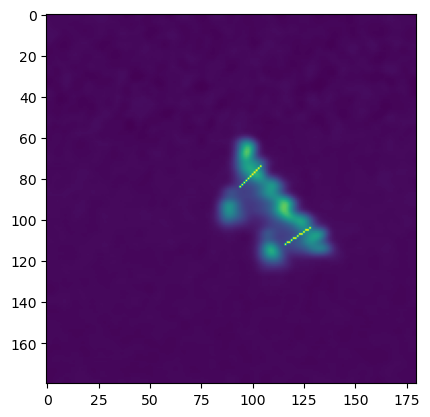

In [3]:
im1 = files[1]['triangle_scan']['I_SD'].to_numpy()
res_h = 2
min_area_h = (im1.shape[0]*im1.shape[1]*res_h*res_h)*0.001
gray_orig, ims, masks = btriangle_detection.triangle_segmentation_alg(im1, res = res_h, min_area = min_area_h, thr_method = 'triangle', inv = True, denoising = True, allow_MET = True, direction ='down')

base, corner_pts, c_im = btriangle_properties.detect_base_alt(gray_orig, masks, 'down')

line_img, points = btriangle_properties.detect_refined_detuning_axis(gray_orig, base, corner_pts, padding_factor = 2)
plt.imshow(line_img)